In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
sys.path.insert(0, os.path.abspath('../src'))
import functions

In [3]:
%matplotlib inline

In [4]:
bank_f = pd.read_csv('../Data/raw/bank-full.csv', sep = ';')
bank_f

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


As we can see all the columns are already in lower case and there are no whitespaces to place any underscore.

In [5]:
bank_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_f.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no NaN values either and the types seem to be correctly set. Now, let's treat in a different way numerical and categorical columns, to this purpose we will split our dataframe in this type of columns

In [7]:
#%%writefile ../src/functions.py

#def num_cat_splitter(df):
#    df1 = df.copy()
#    numerical_df = df1.select_dtypes(np.number)
#    categorical_df = df1.select_dtypes(object)
#    return numerical_df, categorical_df

In [8]:
numerical_df, categorical_df = functions.num_cat_splitter(bank_f)
display(numerical_df.head())
display(categorical_df.head())

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


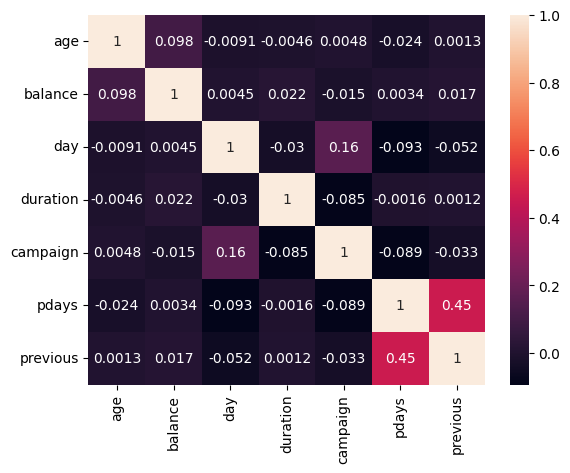

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.savefig('../Slides/corr_matrix_num.png', dpi=300, transparent=True)
plt.show()

As we can see there is no high correlation between columns, it's not necessary to drop any in order to avoid multicollinearity.

In [10]:
#%%writefile -a ../src/functions.py

#def numericals_classifier(df):
#    df1 = df.copy()
#    continuous = []
#    discrete = []
#    for col in df1.columns:
#        if df1[col].nunique() > 36:
#             continuous.append(df1[col])
#        else:
#     discrete.append(df1[col])
#    continuous_df = pd.DataFrame(continuous).T
#    discrete_df = pd.DataFrame(discrete).T 
#    return continuous_df, discrete_df

In [11]:
continuous_df, discrete_df = functions.numericals_classifier(numerical_df)
display(continuous_df.head())
display(discrete_df.head())

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


,day
0,5
1,5
2,5
3,5
4,5


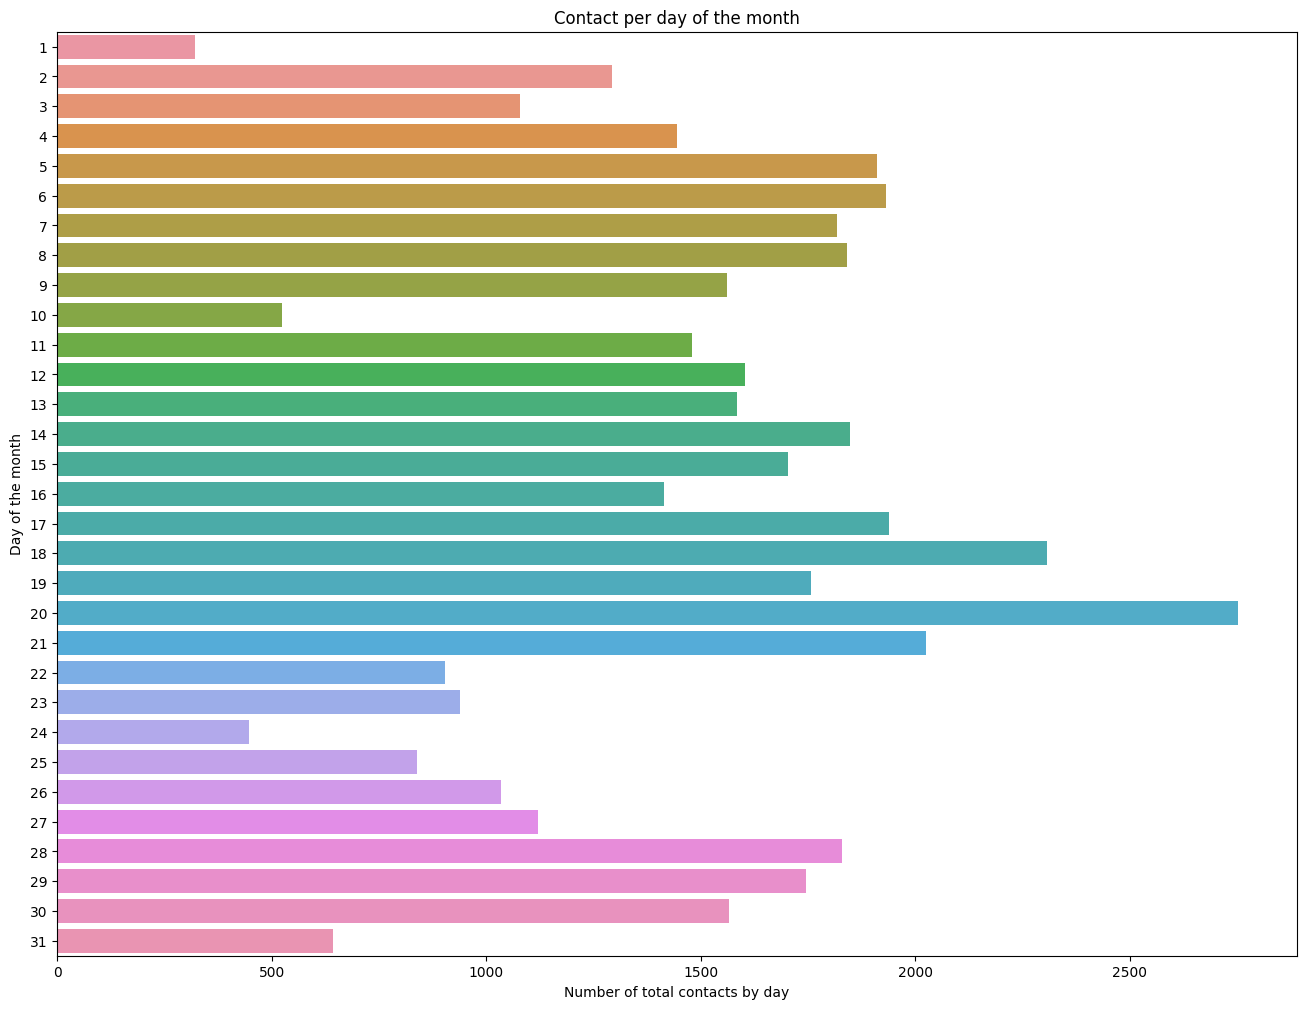

In [12]:
fig = plt.subplots(figsize=(16,12))
sns.countplot(data = discrete_df, y = 'day')
plt.title('Contact per day of the month')
plt.ylabel('Day of the month')
plt.xlabel('Number of total contacts by day')
plt.savefig('../Slides/contact_per_day.png', dpi=300, transparent=True)
plt.show()

In [13]:
#%%writefile -a ../src/functions.py

#def hist_generator(df, save="Yes", name ='../Slides/distib_num_cont.png'):
#    plt_size = len(df.columns)
#    fig, ax = plt.subplots(plt_size, figsize=(12,20))
#    n = 0
#    for col in df.columns:
#        sns.histplot(data = df, x = col, ax = ax[n])
#        n +=1
#    plt.tight_layout()
#    if save =="Yes":
#        plt.savefig(name, dpi=300, transparent=True)
#    plt.show()

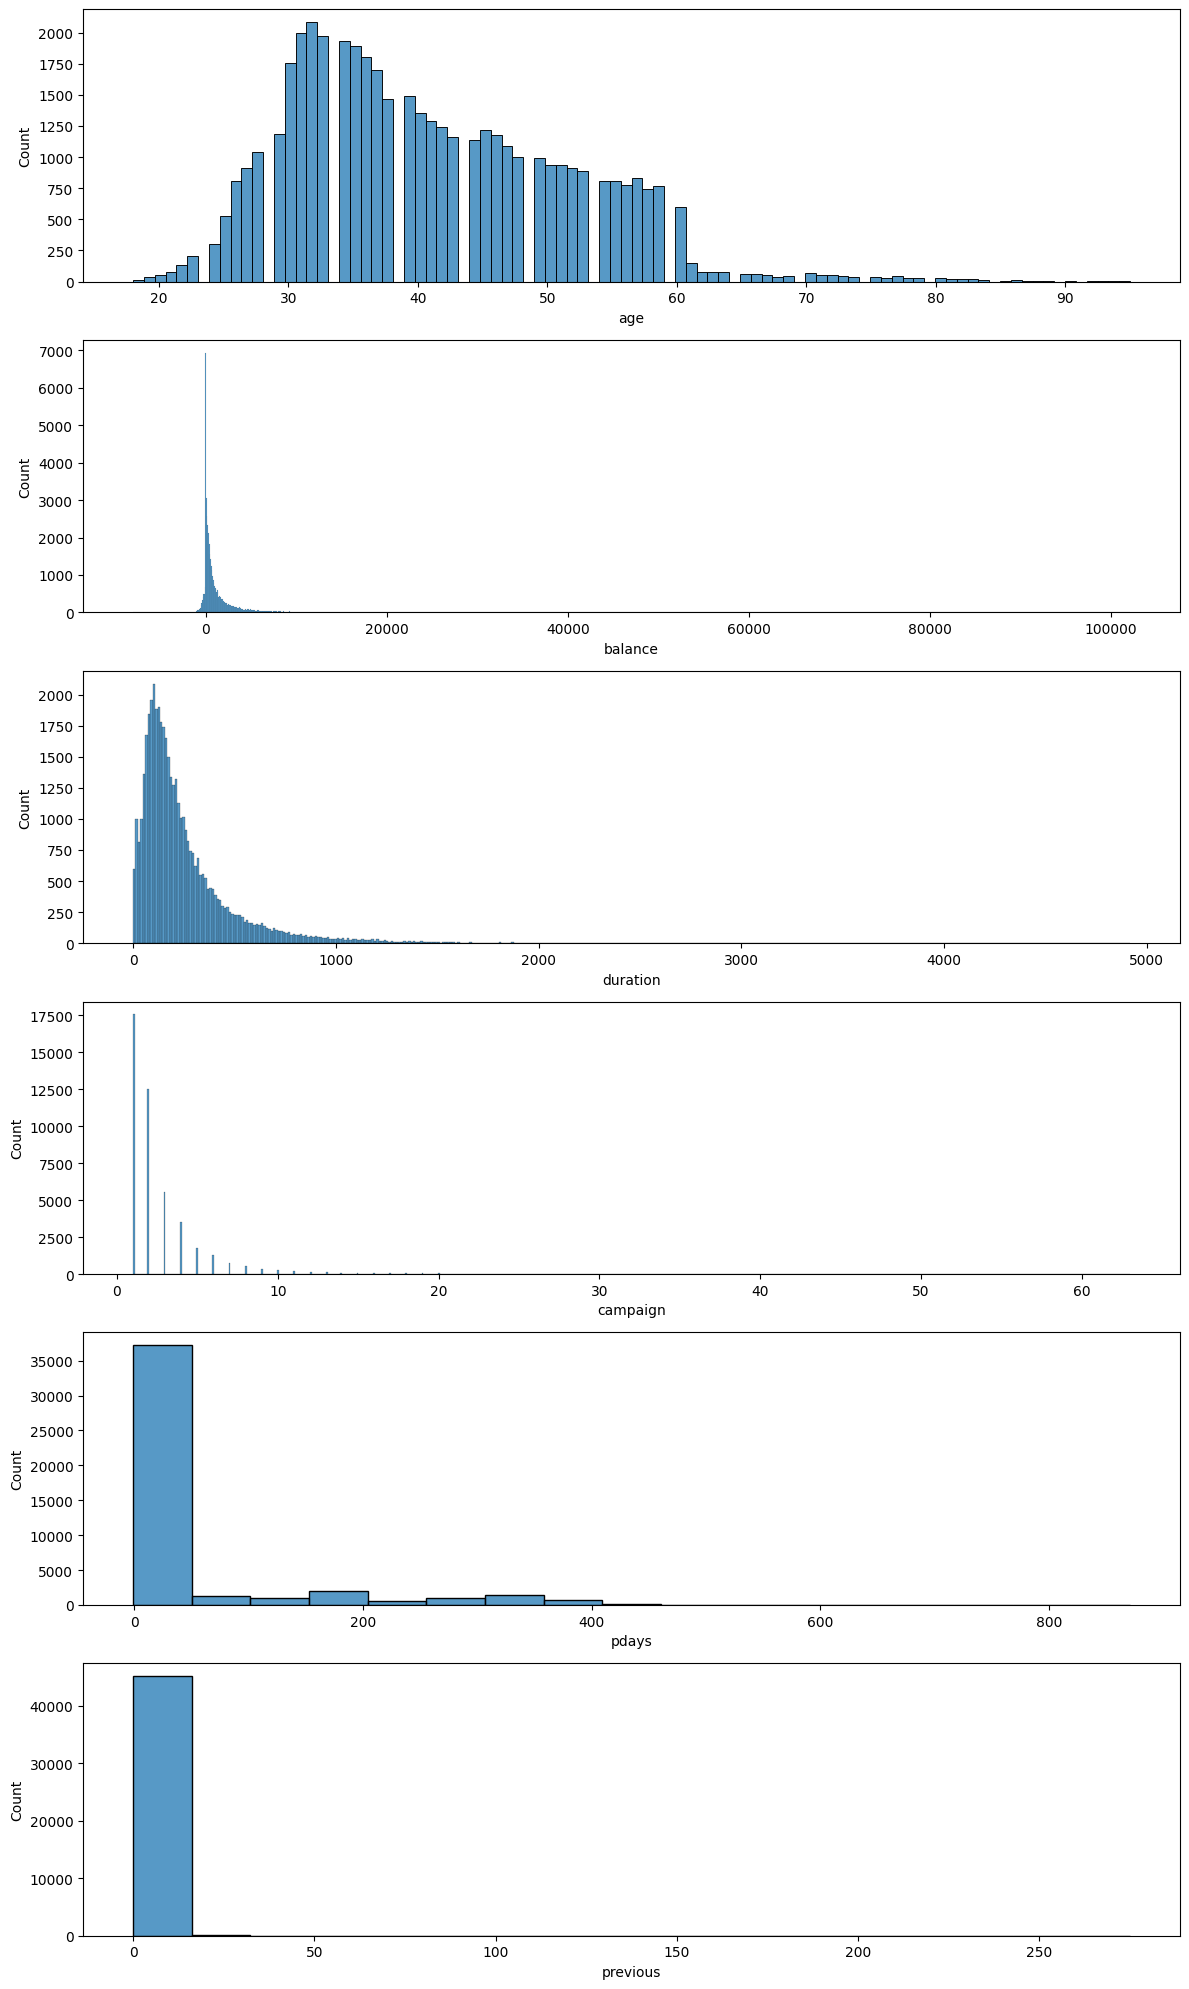

In [14]:
functions.hist_generator(continuous_df)

In [15]:
#CONCLUSIONS REGARDING DISTRIBUTION PLOTS?

In [16]:
continuous_df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


After checking distribution plots, as well as minimum and maximum values it seems there are a lot of outliers, let's display this info better.

In [17]:
#%%writefile -a ../src/functions.py
#def box_generator (df, save="Yes", name ='../Slides/with_outliers_plot.png'):
#    plt_size = len(df.columns)
#    fig, ax = plt.subplots(plt_size, figsize=(16,16))
#    n = 0
#    for col in df.columns:
#        sns.boxplot(data = df, x = col, ax = ax[n])
#        n +=1
#    plt.tight_layout()      
#    plt.show()
    
    #if save =="Yes":
    #    plt.savefig(name, dpi=300, transparent=True)

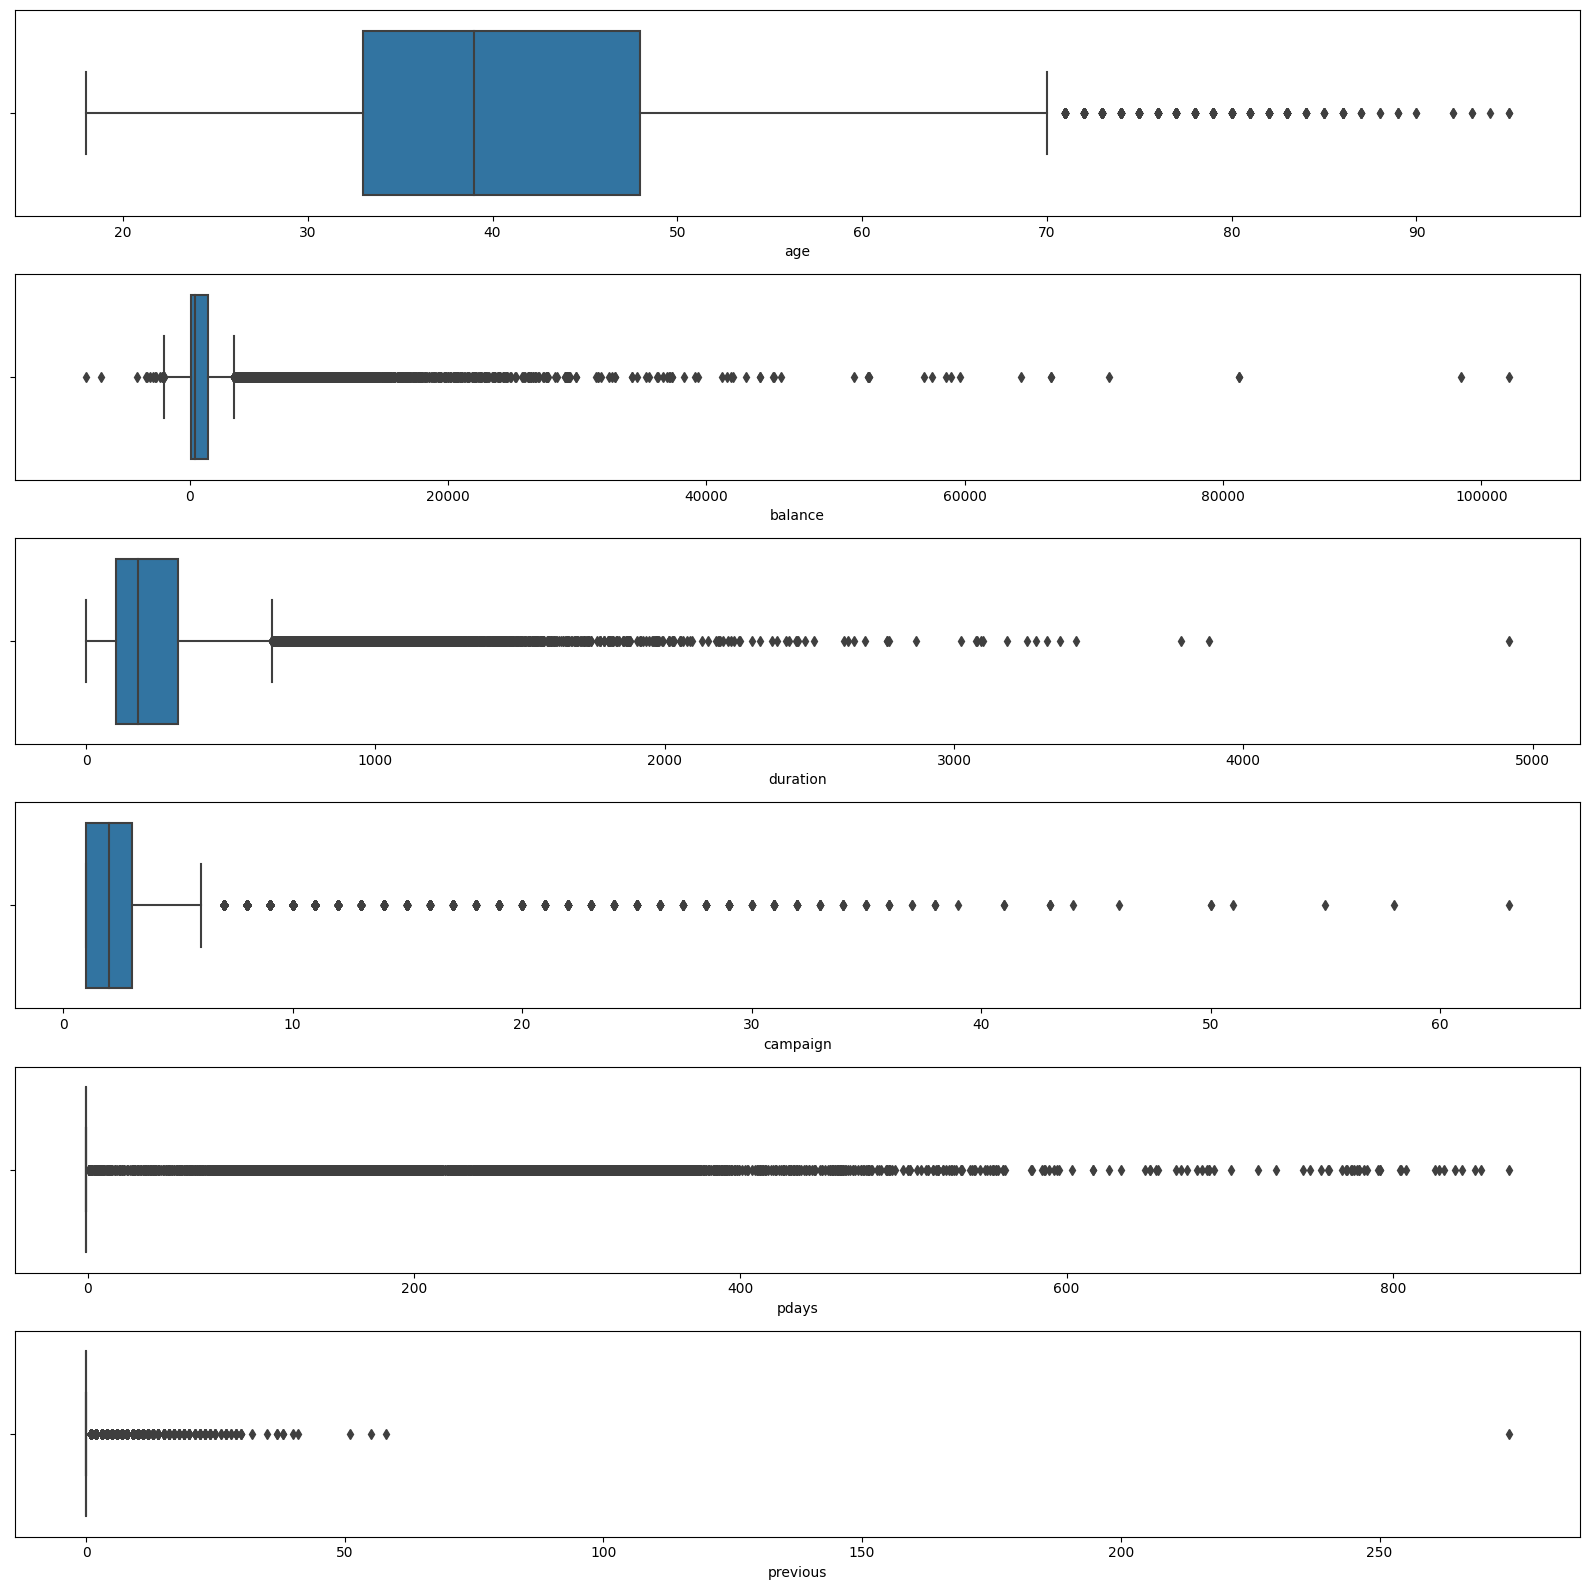

In [18]:
functions.box_generator(continuous_df)

We were right, therefore if we want to get good predictions we will need to deal with them.

**Now, let's go with categorical columns.**

In [19]:
#%%writefile -a ../src/functions.py
#def countplot_generator(df, save="Yes", name ='../Slides/countplot_cat.png'):
#    plt_size = len(df.columns)
#    fig, ax = plt.subplots(plt_size, figsize=(8,50))
#    n = 0
#    for col in df.columns:
#        if (len(df[col].value_counts().index)) >= 6:
#            sns.countplot(data = df, y = col, order = df[col].value_counts().index, ax = ax[n])
#        else:
#            sns.countplot(data = df, x = col, order = df[col].value_counts().index, ax = ax[n])
#        n +=1
#    plt.tight_layout()
#    if save =="Yes":
#        plt.savefig(name, dpi=300, transparent=True)
#    plt.show()

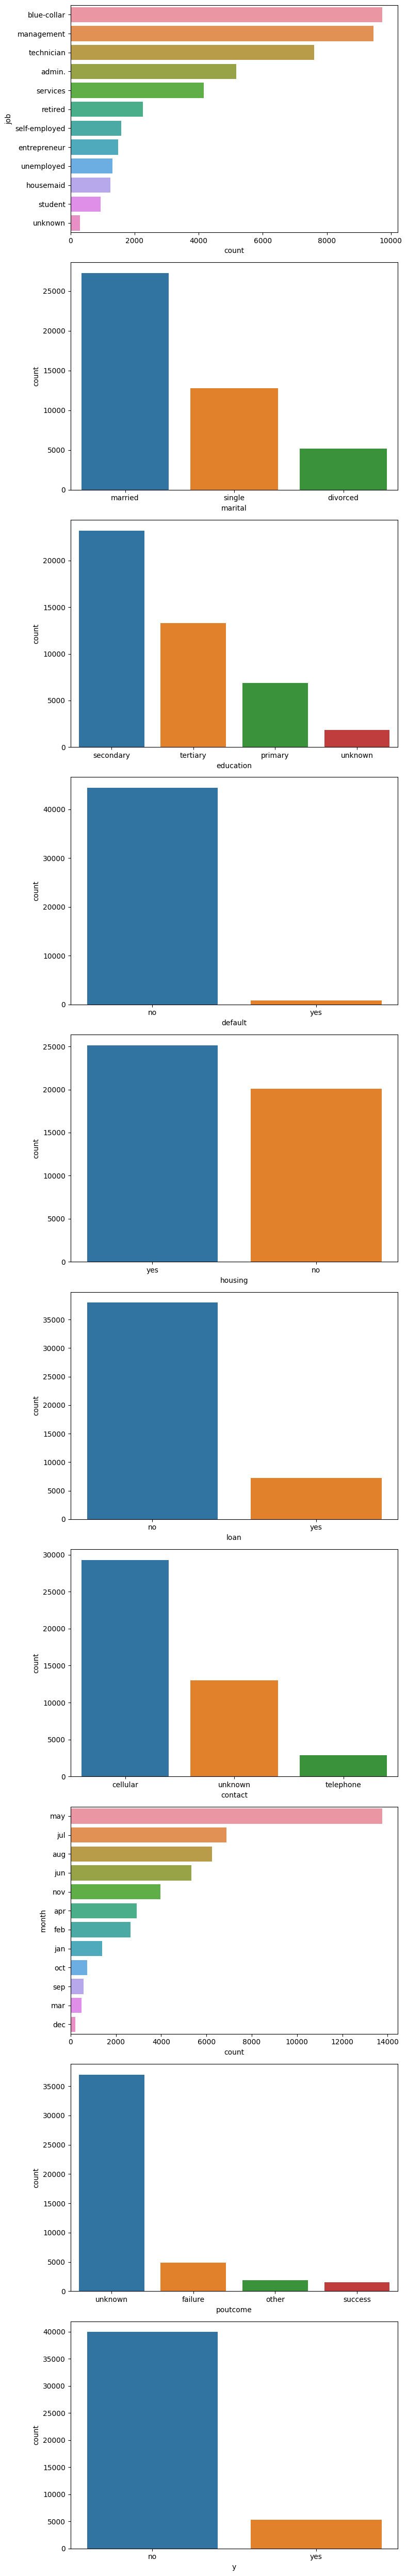

In [20]:
functions.countplot_generator(categorical_df)

In [21]:
#%%writefile -a ../src/functions.py
#def percentage_generator(df):
#    for col in df.columns:
#        print('These are the percentages for the column:', col)
#        print((df[col].value_counts(normalize=True)*100).round(2))
#        print()

In [22]:
#data cleaing for class imbalance: for ['job'] -> inactive(student, retired), other(unknown, housemaid),
#self-employed(entrepreneur, self-employed), white-collar, blue-collar?

In [23]:
functions.percentage_generator(categorical_df)

These are the percentages for the column: job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64

These are the percentages for the column: marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64

These are the percentages for the column: education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64

These are the percentages for the column: default
no     98.2
yes     1.8
Name: default, dtype: float64

These are the percentages for the column: housing
yes    55.58
no     44.42
Name: housing, dtype: float64

These are the percentages for the column: loan
no     83.98
yes    16.02
Name: loan, dtype: float64

These are the percentages for the column: 

**After plotting and checking the percentages of each categorical column, we can conclude the following in relation to the clients contacted:**
* The occupation of the clients is mostly (around 70% of the total): blue-collar, managerial, technical or administrative, in this order.
* The majority were married when contacted.
* About 50% of them had a secondary education, while 30% had a tertiary education.
* By far the majority of the clients did not have unpaid loans (just 1.8% are not paid).
* About 55% already had a housing loan.
* Only 16.02% had another type of loan.
* Most of the contacts were by telephone; however, in 28.80% of the cases the means of contact was unknown.
* May is the day with the most contacts and December the least.
* With respect to previous marketing campaigns, only 3.34% had already contracted the product promoted in previous campaigns and most of them did not know the result of the campaigns.
* Finally, for this campaign, only 11.7% of customers took out the deposit offered.

Now, let's try to filter the data by those customers that accepted the offer.

In [24]:
bank_yes = bank_f[bank_f['y'] == 'yes']

In [25]:
numerical_yes, categorical_yes = functions.num_cat_splitter(bank_yes)

In [26]:
functions.percentage_generator(categorical_yes)

These are the percentages for the column: job
management       24.60
technician       15.88
blue-collar      13.39
admin.           11.93
retired           9.76
services          6.98
student           5.09
unemployed        3.82
self-employed     3.54
entrepreneur      2.33
housemaid         2.06
unknown           0.64
Name: job, dtype: float64

These are the percentages for the column: marital
married     52.09
single      36.15
divorced    11.76
Name: marital, dtype: float64

These are the percentages for the column: education
secondary    46.32
tertiary     37.74
primary      11.17
unknown       4.76
Name: education, dtype: float64

These are the percentages for the column: default
no     99.02
yes     0.98
Name: default, dtype: float64

These are the percentages for the column: housing
no     63.41
yes    36.59
Name: housing, dtype: float64

These are the percentages for the column: loan
no     90.85
yes     9.15
Name: loan, dtype: float64

These are the percentages for the column

**Which differences can we see after applying the filter?:**
* The order by occupation of the clients has changed: managerial has incresed and now is the first, technical and blue-collar has decreased(specially in the last case),while administrative has remain more or less like before filtering.
* The percentage of married people has decreased while single's have increased.
* For terciary education has increased and both for primary and secondary has increase
* The % of clients did not have unpaid loans is even lower.
* Regarding clients who have a housing loan it's even bigger after applying the filter.
* The percentage is even lower for those who have another type of loan.
* Most of the successful contacts were still by telephone increasing heavily while unknown decrease in the same way.
* May is still the month with the most successful contacts, but now the second is August instead of July.
* With respect to previous marketing campaigns, those clients which already contracted a product seems to be more likely to want this new product.

Now it's time to make some groups and aggregations in order to know the kind of customer that is more likely to contract the product

I could have defined a function using a for loop, but I find it to complex, moreover there are parmeters like *ax[n].set_xlim* that are hard to define in the function.

In [27]:
job_full = bank_f.groupby(['job']).agg({'y':'count'})
job_full['percentage'] = (job_full['y']/bank_f['y'].count())*100
job_full = job_full.sort_values(by='percentage',ascending=False).reset_index()

In [28]:
job_yes = bank_yes.groupby(['job']).agg({'y':'count'})
job_yes['percentage'] = (job_yes['y']/bank_yes['y'].count())*100
job_yes=job_yes.sort_values(by='percentage',ascending=False).reset_index()

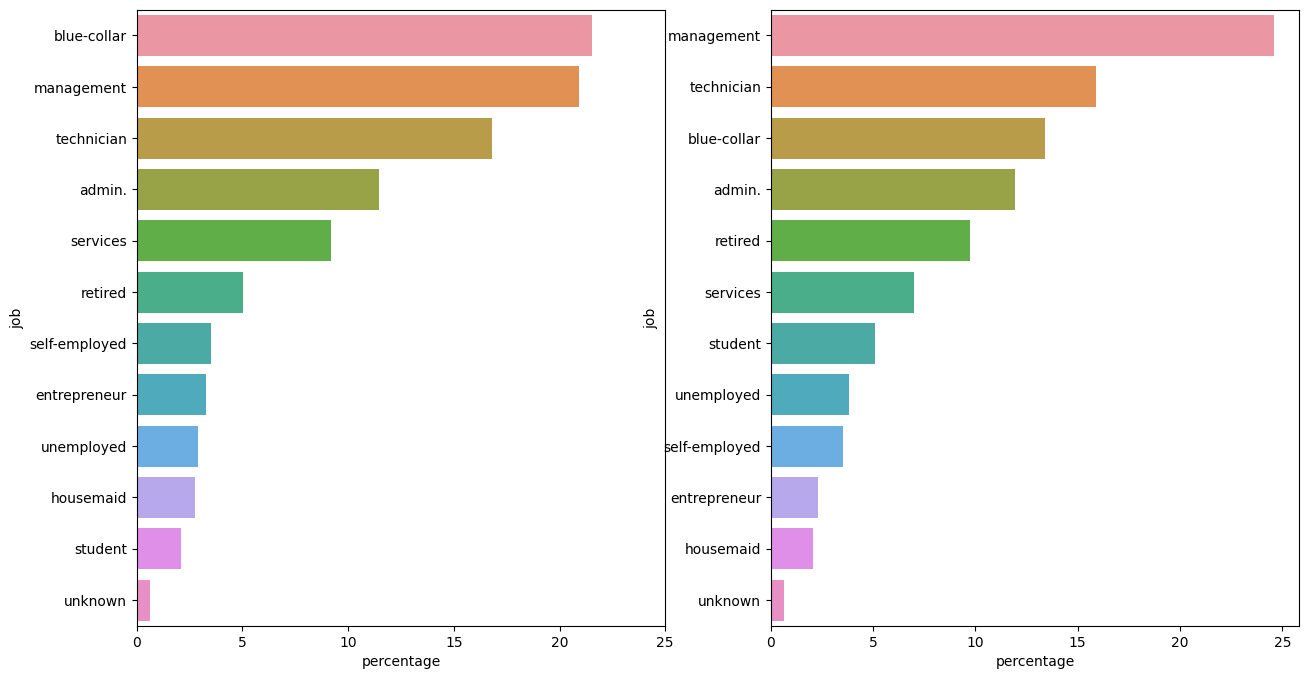

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=job_full, y='job', x='percentage', order =list(job_full['job'].values), ax = ax[0])
ax[0].set_xlim((0,25))
sns.barplot(data=job_yes, y='job', x='percentage', order =list(job_yes['job'].values), ax = ax[1])
plt.savefig('../Slides/jobs_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [30]:
marital_full = bank_f.groupby(['marital']).agg({'y':'count'})
marital_full['percentage'] = (marital_full['y']/bank_f['y'].count())*100
marital_full = marital_full.sort_values(by='percentage',ascending=False).reset_index()

In [31]:
marital_yes = bank_yes.groupby(['marital']).agg({'y':'count'})
marital_yes['percentage'] = (marital_yes['y']/bank_yes['y'].count())*100
marital_yes=marital_yes.sort_values(by='percentage',ascending=False).reset_index()

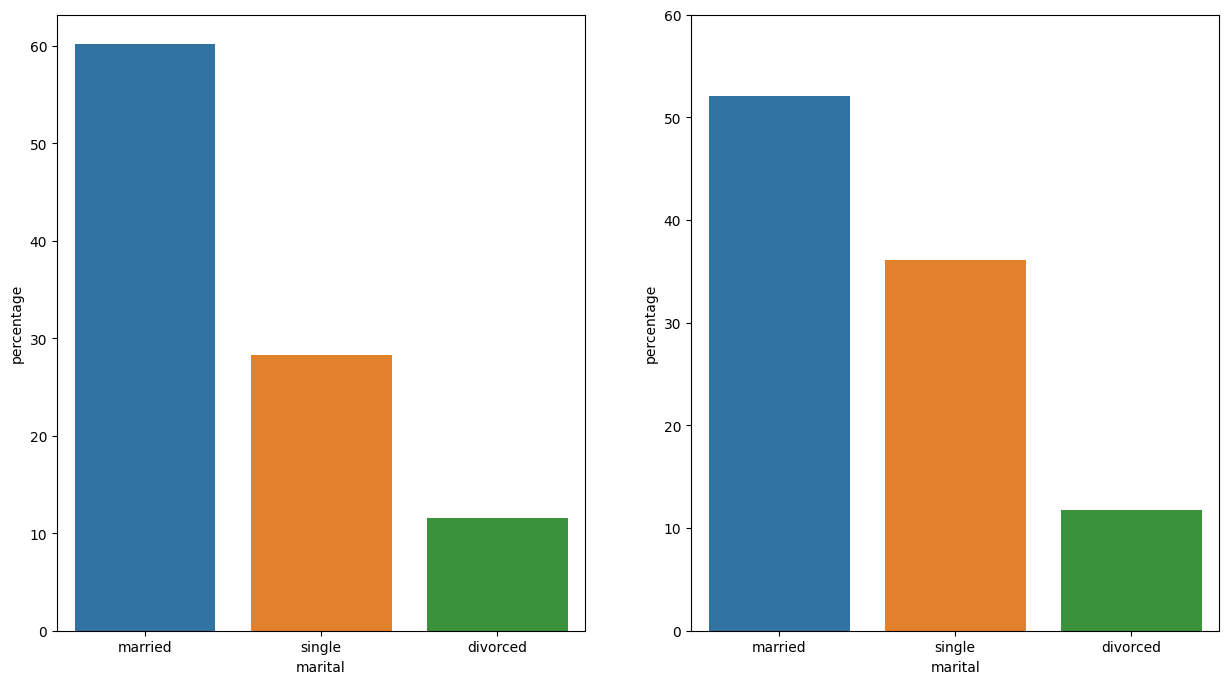

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=marital_full, x='marital', y='percentage', order =list(marital_full['marital'].values), ax = ax[0])
sns.barplot(data=marital_yes, x='marital', y='percentage', order =list(marital_yes['marital'].values), ax = ax[1])
ax[1].set_ylim((0,60))
plt.savefig('../Slides/marital_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [33]:
education_full = bank_f.groupby(['education']).agg({'y':'count'})
education_full['percentage'] = (education_full['y']/bank_f['y'].count())*100
education_full = education_full.sort_values(by='percentage',ascending=False).reset_index()

In [34]:
education_yes = bank_yes.groupby(['education']).agg({'y':'count'})
education_yes['percentage'] = (education_yes['y']/bank_yes['y'].count())*100
education_yes=education_yes.sort_values(by='percentage',ascending=False).reset_index()

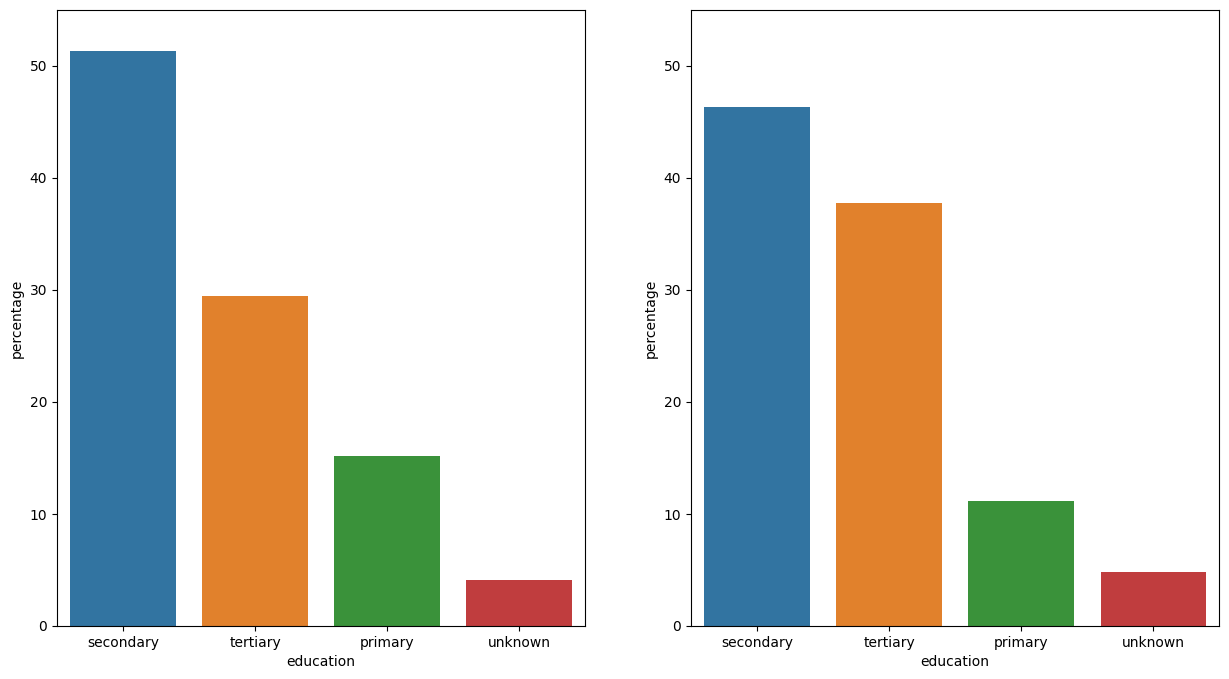

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=education_full, x='education', y='percentage', order =list(education_full['education'].values), ax = ax[0])
ax[0].set_ylim((0,55))
sns.barplot(data=education_yes, x='education', y='percentage', order =list(education_yes['education'].values), ax = ax[1])
ax[1].set_ylim((0,55))
plt.savefig('../Slides/education_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [36]:
default_full = bank_f.groupby(['default']).agg({'y':'count'})
default_full['percentage'] = (default_full['y']/bank_f['y'].count())*100
default_full = default_full.sort_values(by='percentage',ascending=False).reset_index()

In [37]:
default_yes = bank_yes.groupby(['default']).agg({'y':'count'})
default_yes['percentage'] = (default_yes['y']/bank_yes['y'].count())*100
default_yes=default_yes.sort_values(by='percentage',ascending=False).reset_index()

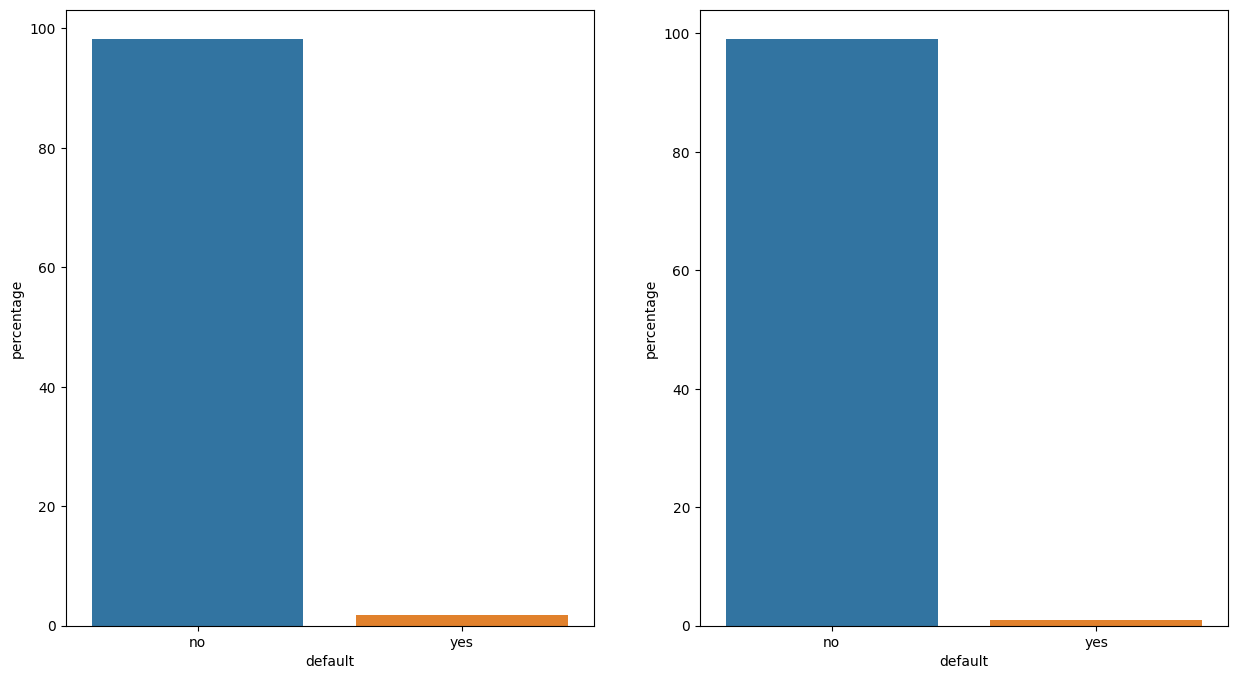

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=default_full, x='default', y='percentage', order =list(default_full['default'].values), ax = ax[0])
sns.barplot(data=default_yes, x='default', y='percentage', order =list(default_yes['default'].values), ax = ax[1])
plt.savefig('../Slides/default_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [39]:
housing_full = bank_f.groupby(['housing']).agg({'y':'count'})
housing_full['percentage'] = (housing_full['y']/bank_f['y'].count())*100
housing_full = housing_full.sort_values(by='percentage',ascending=False).reset_index()

In [40]:
housing_yes = bank_yes.groupby(['housing']).agg({'y':'count'})
housing_yes['percentage'] = (housing_yes['y']/bank_yes['y'].count())*100
housing_yes=housing_yes.sort_values(by='percentage',ascending=False).reset_index()

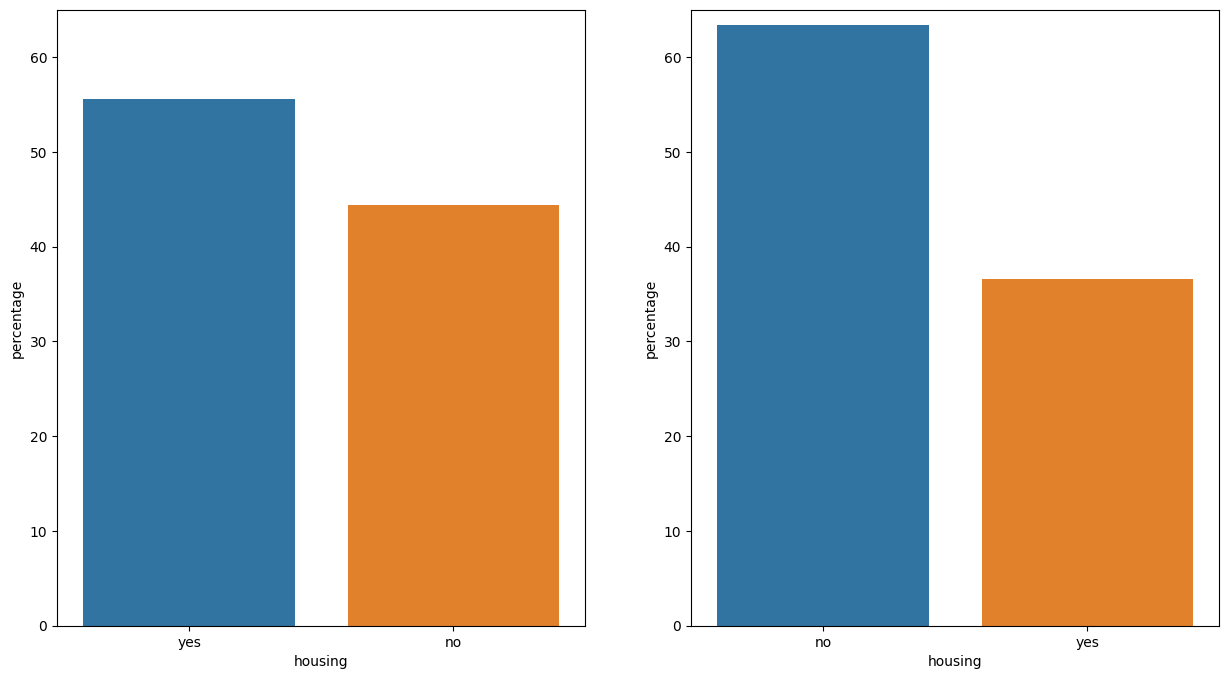

In [41]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=housing_full, x='housing', y='percentage', order =list(housing_full['housing'].values), ax = ax[0])
ax[0].set_ylim((0,65))
sns.barplot(data=housing_yes, x='housing', y='percentage', order =list(housing_yes['housing'].values), ax = ax[1])
ax[1].set_ylim((0,65))
plt.savefig('../Slides/housing_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [42]:
loan_full = bank_f.groupby(['loan']).agg({'y':'count'})
loan_full['percentage'] = (loan_full['y']/bank_f['y'].count())*100
loan_full = loan_full.sort_values(by='percentage',ascending=False).reset_index()

In [43]:
loan_yes = bank_yes.groupby(['loan']).agg({'y':'count'})
loan_yes['percentage'] = (loan_yes['y']/bank_yes['y'].count())*100
loan_yes=loan_yes.sort_values(by='percentage',ascending=False).reset_index()

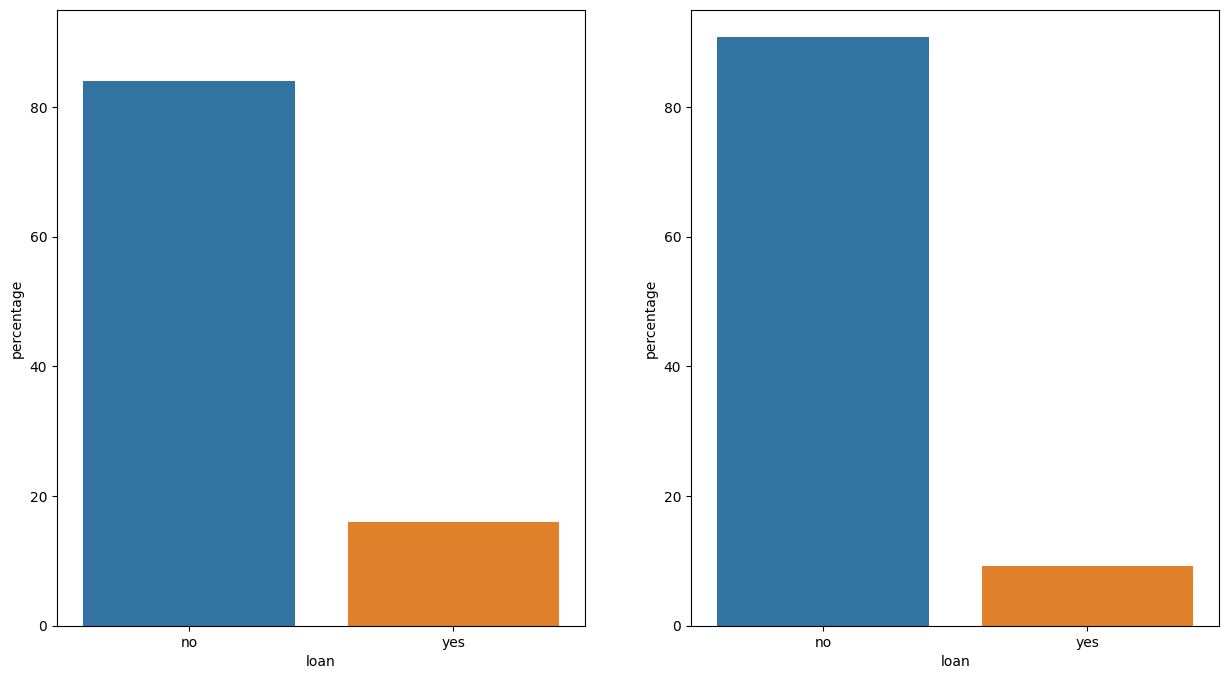

In [44]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=loan_full, x='loan', y='percentage', order =list(loan_full['loan'].values), ax = ax[0])
ax[0].set_ylim((0,95))
sns.barplot(data=loan_yes, x='loan', y='percentage', order =list(loan_yes['loan'].values), ax = ax[1])
ax[1].set_ylim((0,95))
plt.savefig('../Slides/loan_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [45]:
contact_full = bank_f.groupby(['contact']).agg({'y':'count'})
contact_full['percentage'] = (contact_full['y']/bank_f['y'].count())*100
contact_full = contact_full.sort_values(by='percentage',ascending=False).reset_index()

In [46]:
contact_yes = bank_yes.groupby(['contact']).agg({'y':'count'})
contact_yes['percentage'] = (contact_yes['y']/bank_yes['y'].count())*100
contact_yes=contact_yes.sort_values(by='percentage',ascending=False).reset_index()

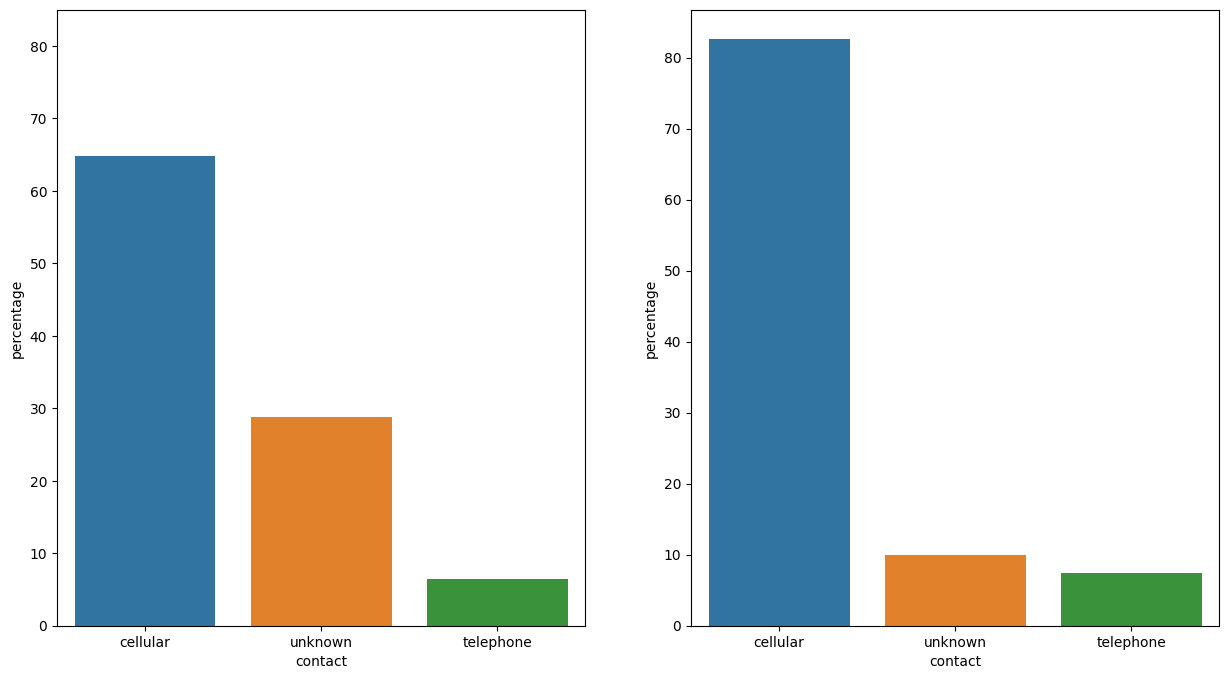

In [47]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=contact_full, x='contact', y='percentage', order =list(contact_full['contact'].values), ax = ax[0])
ax[0].set_ylim((0,85))
sns.barplot(data=contact_yes, x='contact', y='percentage', order =list(contact_yes['contact'].values), ax = ax[1])
plt.savefig('../Slides/contact_ba_yes.png', dpi=300, transparent=True)
plt.show()

In [48]:
month_full = bank_f.groupby(['month']).agg({'y':'count'})
month_full['percentage'] = (month_full['y']/bank_f['y'].count())*100
month_full = month_full.sort_values(by='percentage',ascending=False).reset_index()

In [49]:
month_yes = bank_yes.groupby(['month']).agg({'y':'count'})
month_yes['percentage'] = (month_yes['y']/bank_yes['y'].count())*100
month_yes=month_yes.sort_values(by='percentage',ascending=False).reset_index()

In [50]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

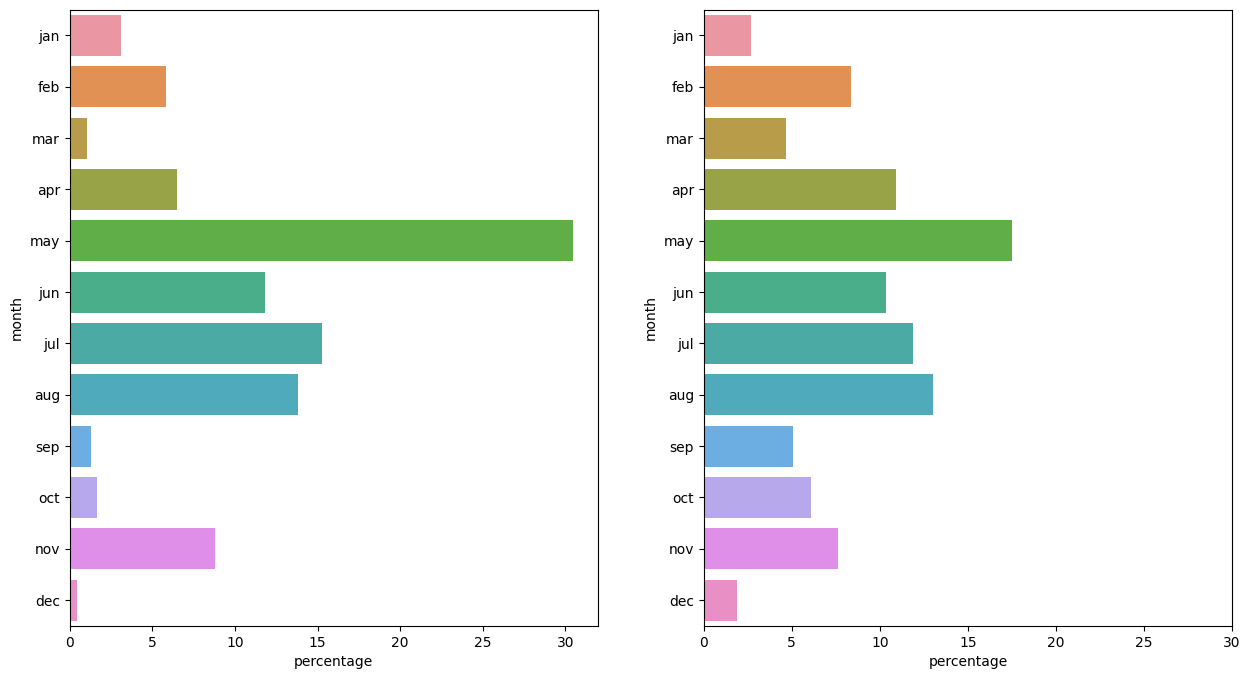

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=month_full, y='month', x='percentage', order =months, ax = ax[0])
sns.barplot(data=month_yes, y='month', x='percentage', order =months, ax = ax[1])
ax[1].set_xlim((0,30))
plt.savefig('../Slides/month_ba_yes.png', dpi=300, transparent=True)
plt.show()

I want to get a more meaningful plot getting a lineplot:

In [52]:
line_f = bank_f.groupby(['month']).agg({'y':'count'})
line_f['percentage'] = (line_f['y']/bank_f['y'].count())*100
line_f=line_f.reset_index()
line_f['month'] = pd.Categorical(line_f['month'], categories=months, ordered=True)
line_f=line_f.sort_values(by='month')
line_f

,month,y,percentage
4,jan,1403,3.103227
3,feb,2649,5.859194
7,mar,477,1.055053
0,apr,2932,6.485147
8,may,13766,30.448342
6,jun,5341,11.813497
5,jul,6895,15.250713
1,aug,6247,13.817434
11,sep,579,1.280662
10,oct,738,1.632346


In [53]:
line_yes = bank_yes.groupby(['month']).agg({'y':'count'})
line_yes['percentage'] = (line_yes['y']/bank_yes['y'].count())*100
line_yes=line_yes.reset_index()
line_yes['month'] = pd.Categorical(line_yes['month'], categories=months, ordered=True)
line_yes=line_yes.sort_values(by='month')
line_yes

,month,y,percentage
4,jan,142,2.684818
3,feb,441,8.338060
7,mar,248,4.688977
0,apr,577,10.909435
8,may,925,17.489128
6,jun,546,10.323313
5,jul,627,11.854793
1,aug,688,13.008130
11,sep,269,5.086028
10,oct,323,6.107015


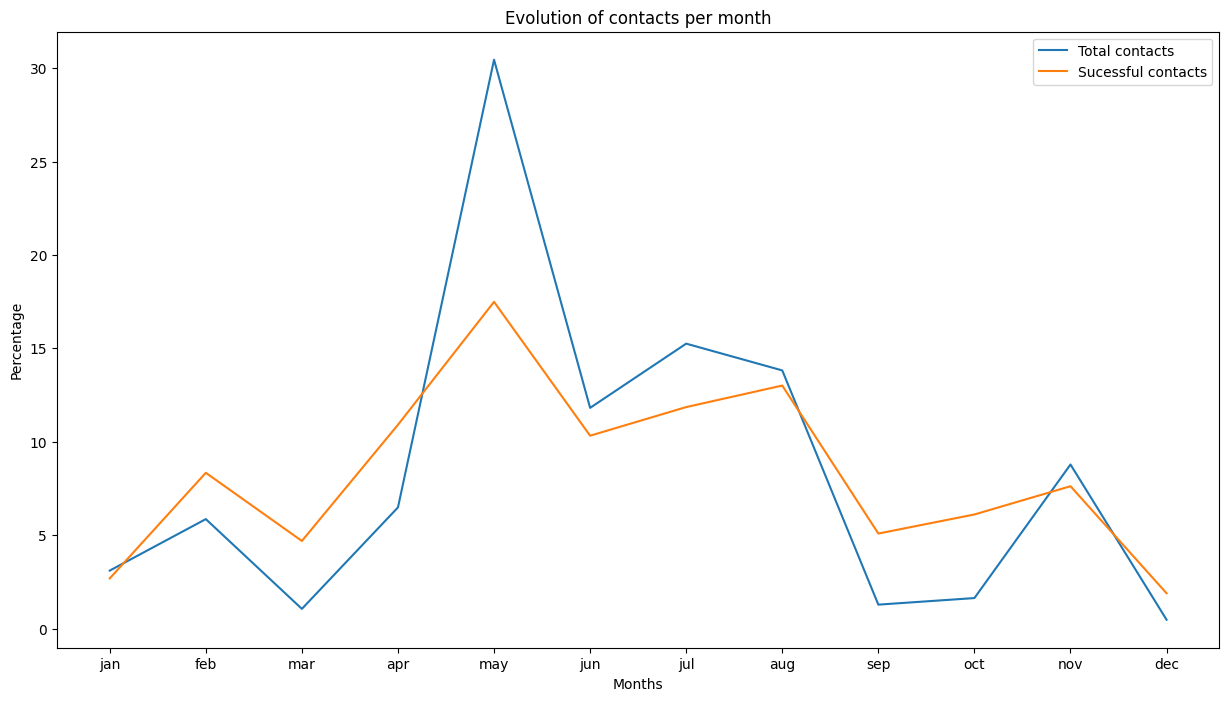

In [54]:
fig = plt.subplots(figsize=(15,8))
plt.plot(line_f['month'],line_f['percentage'],label="Total contacts")
plt.plot(line_yes['month'],line_yes['percentage'],label='Sucessful contacts')
plt.title('Evolution of contacts per month')
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.legend()
plt.savefig('../Slides/month_ba_line.png', dpi=300, transparent=True)
plt.show()

In [55]:
poutcome_full = bank_f.groupby(['poutcome']).agg({'y':'count'})
poutcome_full['percentage'] = (poutcome_full['y']/bank_f['y'].count())*100
poutcome_full = poutcome_full.sort_values(by='percentage',ascending=False).reset_index()

In [56]:
poutcome_yes = bank_yes.groupby(['poutcome']).agg({'y':'count'})
poutcome_yes['percentage'] = (poutcome_yes['y']/bank_yes['y'].count())*100
poutcome_yes=poutcome_yes.sort_values(by='percentage',ascending=False).reset_index()

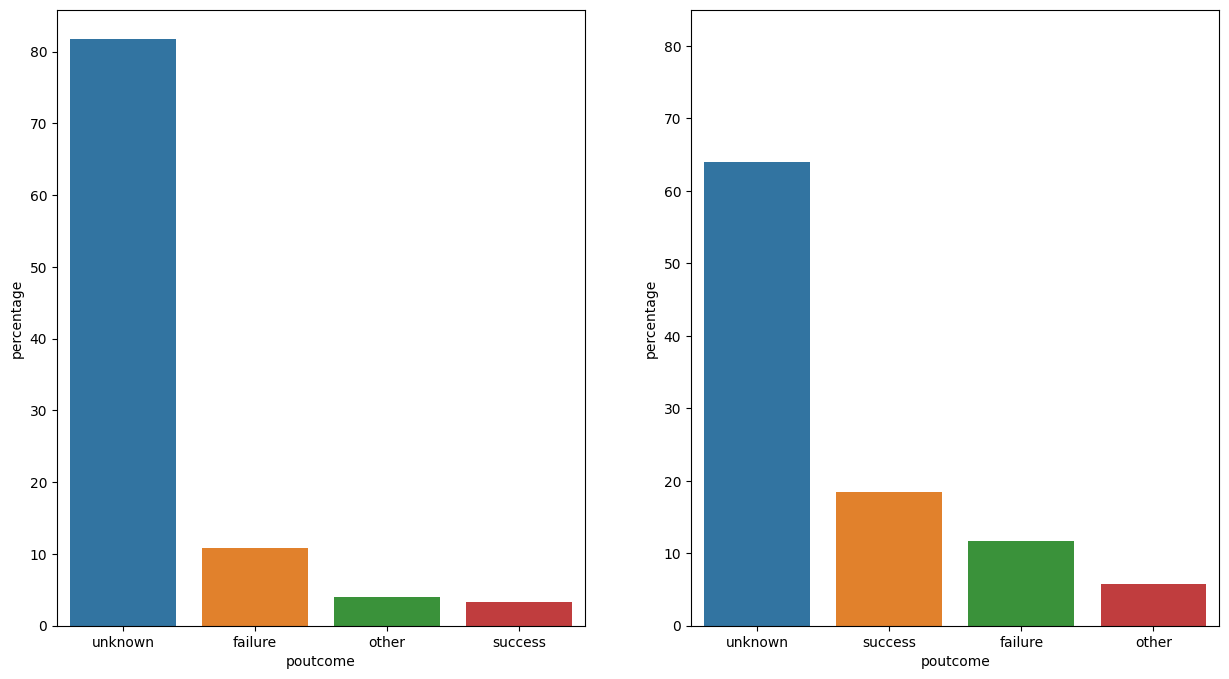

In [57]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.barplot(data=poutcome_full, x='poutcome', y='percentage', order =list(poutcome_full['poutcome'].values), ax = ax[0])
sns.barplot(data=poutcome_yes, x='poutcome', y='percentage', order =list(poutcome_yes['poutcome'].values), ax = ax[1])
ax[1].set_ylim((0,85))
plt.savefig('../Slides/poutcome_ba_yes.png', dpi=300, transparent=True)
plt.show()

# **CONCLUSIONS:** 
After performing these plots and aggregations we can conclude that the characteristics of the ideal customer which is the most likely to contract our deposit are:
* Works in **managemet**, moreover(taking into account their lower sample), **service**, **retired** and **students** have some bigger propension to contract this product more frequently.
* In total, there are more married people, however **singles** show a significant propension
* Same happen with education, secondary is the most numerous atribute but **tertitary** educated people tend to be more open.
* With default the tendency is sligh because of the little sample but seems that if you have **previous unpaid loan** you are less likely to contract it.
* No matter if you had a housing or **any other kind of loan**, you are **less likely** to want a deposit.
* Calling to the **celular** seem to have a higher success ratio
* **May** is the moth with **more contracts** signed but this and specially **July** show a *bad performance* getting sucess, while **april, february, october, september and march** is *good*.

I have chosen to work with median instead of mean, taking into account the amount of outliers

Which is the behaviour of the best and the worst customers(according their average balance in their account during the yerar) when they were asked in contract the product promoted in this marketing campaing?

In [58]:
display(bank_yes.nlargest(5,['balance']))
display(bank_yes.nsmallest(5,['balance']))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
40763,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
43053,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,-1,0,unknown,yes
35392,51,technician,married,secondary,no,-1944,yes,no,cellular,7,may,623,1,-1,0,unknown,yes
40267,56,retired,married,secondary,no,-1206,yes,no,cellular,15,jun,382,2,-1,0,unknown,yes
8218,42,technician,single,secondary,yes,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
9442,28,technician,single,secondary,yes,-1042,yes,no,unknown,6,jun,712,2,-1,0,unknown,yes


In [59]:
display(bank_f.nlargest(5,['balance']))
display(bank_f.nsmallest(5,['balance']))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


Now, let's perform an analysis by age

In [60]:
#age_labels = ['<25', '26-34', '35-44', '45-54', '55-64','<65']
#bank_f['age_category'] = pd.cut(bank_f['age'],[0,25,35,45,55,65,100],labels=age_labels)
#bank_yes['age_category'] = pd.cut(bank_yes['age'],[0,25,35,45,55,65,100],labels=age_labels)

In [61]:
bank_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


I will not store the resultant Jupyter Notebook due to I haven't perform any change I want to save for my transformations and predictions (maybe the slicing just with yes??).